In [5]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
import cmath 
import os
A = np.full((256,256),1)



*******************MANIP01****************************************************

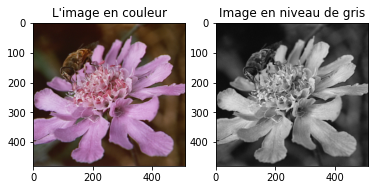

In [12]:
image = plt.imread('flower.bmp')
plt.subplot(1,2,1)
plt.title("L'image en couleur")
plt.imshow(image)
R,G,B=cv.split(image)

#conversion en niveau de gris 

image_gris= 0.2126*R+0.7152*G+0.0722*B


plt.subplot(1,2,2)
plt.title("Image en niveau de gris")
plt.imshow(image_gris, plt.cm.gray)

In [ ]:


#histogramme des eff:




image_egalisee=cv.equalizeHist(np.uint8(image_gris))
plt.imshow(image_egalisee,cmap='gray')



3-3- L'histogramme, l'Histogramme normalisé et l'histogramme cumulé  : 

Text(0.5, 1.0, 'histogramme cumuler')

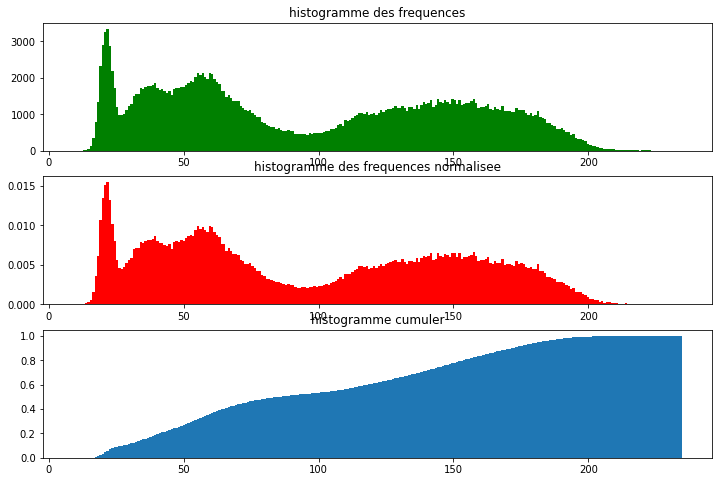

In [14]:
histogramme = image_gris.ravel()
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.hist(histogramme,bins=256,color='g')
plt.title('histogramme des frequences')
plt.subplot(3,1,2)
plt.hist(histogramme,bins=256,density='True',color='r')
plt.title('histogramme des frequences normalisee')
plt.subplot(3,1,3)
plt.hist(histogramme,density=True, cumulative=True,bins=256)
plt.title('histogramme cumuler')

Commentaire : l'image n"est pas contrastée, les blanc ne sont pas trop blanc et le snoir ne sont pas trop noir, les valeurs des niveau de gris sont entre 25 et 200 a peu pres .

5-On realise un egalisation d'histogramme 

(array([1., 2., 0., 3., 0., 0., 4., 0., 0., 0., 3., 0., 0., 4., 0., 0., 0.,
        3., 0., 0., 2., 0., 1., 1., 1., 2., 0., 1., 2., 0., 1., 2., 0., 2.,
        0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0.,
        2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2., 0., 2.,
        0., 2., 0., 3., 0., 0., 2., 0., 2., 0., 3., 0., 0., 2., 0., 3., 0.,
        0., 2., 0., 3., 0., 0., 2., 0., 2., 0., 3., 0., 0., 2., 0., 2., 0.,
        1., 2., 0., 2., 0., 2., 0., 1., 2., 0., 1., 2., 0., 1., 1., 1., 2.,
        0., 1., 1., 1., 1., 2., 0., 1., 0., 2., 0., 1., 1., 1., 1., 1., 1.,
        2., 0., 2., 0., 1., 2., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0.,
        1., 1., 1., 1., 2., 0., 1., 1., 1., 2., 0., 1., 2., 0., 1., 1., 2.,
        0., 1., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 2., 0.,
        1., 2., 0., 2., 0., 1., 2., 0., 1., 2., 0., 2., 0., 1., 2., 0., 1.,
        2., 0., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 2., 0., 1., 1., 2.,
        0., 

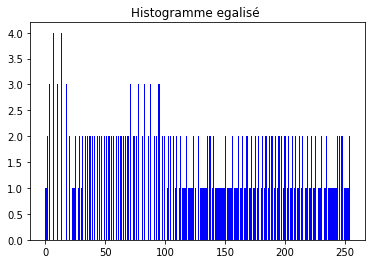

In [29]:
histo= np.zeros(256) 
for i in histogramme:
    histo[int(i)]=histo[int(i)]+1
  #calculer l'histogramme cumunlee
histo_cumulee=np.zeros(histo.size)
histo_cumulee[0]=0
for i in range(1,256):
  histo_cumulee[i]=histo[i]+histo_cumulee[i-1]
  #calculer l'histo egalise
hcn=np.round((histo_cumulee/histogramme.size)*255)
plt.title("Histogramme egalisé ")
plt.hist(hcn,bins=256,color='b')




Text(0.5, 1.0, 'Image egalisée')

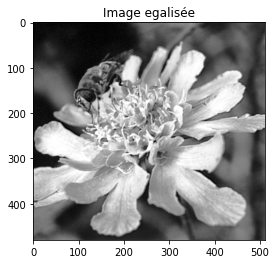

In [31]:
image_gris_egalisee=image_gris
for i in range(0,image_gris.shape[0]):       
    for j in range(0,image_gris.shape[1]):   
        image_gris_egalisee[i,j] = hcn[int(image_gris[i,j])]
plt.imshow( image_gris_egalisee, plt.cm.gray)
plt.title("Image egalisée")

6-Egalisation avec cv.equalizeHist

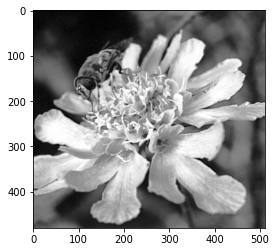

In [32]:
image_egalisee=cv.equalizeHist(np.uint8(image_gris))
plt.imshow(image_egalisee,cmap='gray')



Comparaison : l'image resultante est la meme avec les 2 methodes . 

7- Egalisation des 3 composantes couleurs indépendamment puis on visualise l'image resultante avec son entropie : 

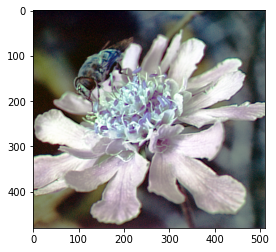

In [45]:
B,G,R = cv.split(image)
B=cv.equalizeHist(np.uint8(B))
G=cv.equalizeHist(np.uint8(G))
R=cv.equalizeHist(np.uint8(R))
image2=cv.merge((B,G,R))
image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)
plt.imshow(image2)


*************************Manip 02 *****************************************************************

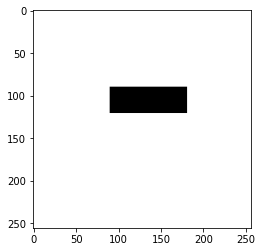

In [28]:
for i in range (90,121):
    for j in range (90,181):
            A[i][j]=0 
plt.imshow(A,cmap = 'gray' )

    Creation de l'image B 

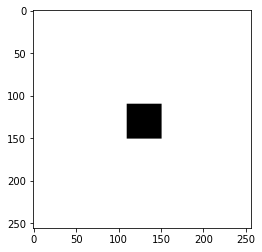

In [29]:
B = np.full((256,256),1)
for i in range (110,151):
    for j in range (110,151):
            B[i][j]=0 

plt.imshow(B,cmap = 'gray' )

2- les operation logiques : 


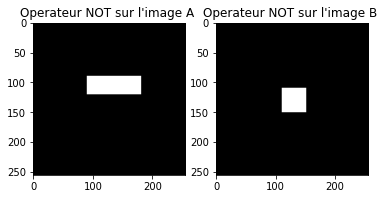

In [47]:
Ai = cv.bitwise_not(A)
plt.subplot(1,2,1)
plt.title("Operateur NOT sur l'image A ")
plt.imshow(Ai,cmap='gray')
Bi= cv.bitwise_not(B)
plt.subplot(1,2,2)
plt.title("Operateur NOT sur l'image B ")
plt.imshow(Bi,cmap='gray')


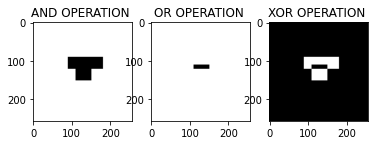

In [53]:
AND_image = cv.bitwise_and(A,B)
plt.title('AND OPERATION ')

plt.subplot(1,3,1)
plt.title('AND OPERATION ')
plt.imshow(AND_image,cmap= 'gray')


OR_image = cv.bitwise_or(A,B)
plt.subplot(1,3,2)
plt.title('OR OPERATION ')
plt.imshow(OR_image,cmap= 'gray')
XOR_image = cv.bitwise_xor(A,B)

plt.subplot(1,3,3)
plt.title('XOR OPERATION ')

plt.imshow(XOR_image,cmap= 'gray')



Interpretation : 
-l'operateur NOT transforme le 1 en 0 et le 0 en 1 
les resultats sont obtenus en applicant les operation sur le font cad que c"est le NOT de ce qu'on voulait vraiment faire .
- l'operateur AND il est supposé nous donner 1 si et seulement si les 2 sont egales a 1 alors que ici il nous donne un 0 si un des 0 est egale a 0 qui est le resultat d'un OR 
- OR = 0 et 0 nous donne 0 
ce qui est le resultat d'un AND
- tandis que l'operateur Xor nous donne les resultats souhaités 
- donc il faut appliquer un font noir pour que cela marche et pour qu'on puisse obtenir les resultats attendus 



3-Application des operateurs sur Ai et Bi : 

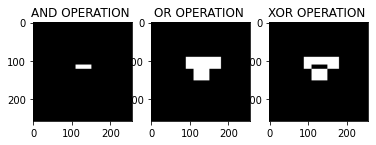

In [54]:
ANDi_image = cv.bitwise_and(Ai,Bi)
plt.title('AND OPERATION ')

plt.subplot(1,3,1)
plt.title('AND OPERATION ')
plt.imshow(ANDi_image,cmap= 'gray')


ORi_image = cv.bitwise_or(Ai,Bi)
plt.subplot(1,3,2)
plt.title('OR OPERATION ')
plt.imshow(ORi_image,cmap= 'gray')
XORi_img = cv.bitwise_xor(Ai,Bi)

plt.subplot(1,3,3)
plt.title('XOR OPERATION ')

plt.imshow(XORi_img,cmap= 'gray')

Comparaison : 
-And operation : dans ce cas il est le resultat d" l'inversion du OR du cas precedent . 
-OR operation : dans ce cas il est l'iverse du AND du resultats precedents . 

les images doivent avoir un font Noir a l'entréé pour qu'on puisse avoir des resultats coherents lors de leur utilisation .,

*********************************************Manip 03 *************************************************

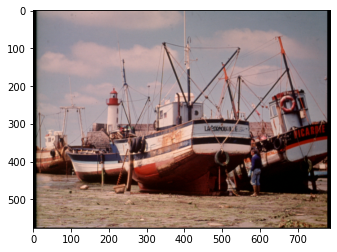

In [58]:
boat = cv.imread("BoatsColor.bmp")
boat = cv.cvtColor(boat, cv.COLOR_BGR2RGB)
# car les images sont stockées en BGR dans open cv donc on doit passer par cette fonction 
plt.imshow(boat)